# Exploring Previous MSc Dissertation Data
Reference: "An Investigation Into Software Tools To Combat Media Bias" by Jonathan Beaumont, MSc dissertation, 2020.

In [1]:
import json
import numpy as np
import pandas as pd

In [2]:
# Load the data
"""
with open("articles.json", "r") as file:
    data = json.load(file)
"""
articles = pd.read_json('articles.json')

In [9]:
print(f"Number of articles: {articles.shape[0]}")
print(f"Number of articles attributes: {articles.shape[1]} = \n")

for attr in articles.columns.values:
    print(attr)

Number of articles: 161225
Number of articles attributes: 13 = 

url
publisher
headline
twitterHeadline
description
categories
body
images
thumbnail
videos
datePublished
dateUpdated
dateParsed


In [10]:
articles.head(3)

,url,publisher,headline,twitterHeadline,description,categories,body,images,thumbnail,videos,datePublished,dateUpdated,dateParsed
0,http://news.sky.com/story/102-migrants-interce...,sky,102 migrants intercepted in Channel - highest ...,102 migrants intercepted in Channel - highest ...,Border Force stops five boats containing peopl...,uk news,"More than 100 migrants, including seven childr...",[{'alt': 'Small boats used to carry the migran...,None,[],2020-02-07T16:51:00.000Z,2020-02-07T18:38:00.000Z,2020-02-07T20:22:59.000Z
1,http://news.sky.com/story/11-dead-and-300-trea...,sky,11 dead and 300 treated in hospital after drin...,11 dead and 300 treated in hospital after drin...,"Lambanog is a popular drink in provinces, whic...",world,At least 11 people have died after drinking co...,[{'alt': 'More than 300 people were treated in...,None,[],2019-12-23T07:54:00.000Z,2019-12-23T08:50:00.000Z,2019-12-23T13:35:32.000Z
2,http://news.sky.com/story/12-shocking-claims-o...,sky,12 shocking claims of abuse in leaked Labour a...,12 shocking claims of abuse in leaked Labour a...,The party says allegations staffers were instr...,politics,"Jeremy Corbyn has made Labour a ""welcoming ref...",[],None,[{'alt': 'Jeremy Corbyn continues to condemn a...,2019-12-05T18:13:00.000Z,2019-12-05T19:55:00.000Z,2019-12-06T00:59:36.000Z


In [11]:
articles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161225 entries, 0 to 161224
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   url              161225 non-null  object
 1   publisher        161225 non-null  object
 2   headline         161225 non-null  object
 3   twitterHeadline  161225 non-null  object
 4   description      161225 non-null  object
 5   categories       161225 non-null  object
 6   body             161225 non-null  object
 7   images           161225 non-null  object
 8   thumbnail        44659 non-null   object
 9   videos           161225 non-null  object
 10  datePublished    161225 non-null  object
 11  dateUpdated      161225 non-null  object
 12  dateParsed       161225 non-null  object
dtypes: object(13)
memory usage: 16.0+ MB


In [12]:
# https://stackoverflow.com/questions/5676646/how-can-i-fill-out-a-python-string-with-spaces

for attr in articles.columns.values:
    print(f"{attr: <15} = {type(articles.iloc[0][attr])}")

url             = <class 'str'>
publisher       = <class 'str'>
headline        = <class 'str'>
twitterHeadline = <class 'str'>
description     = <class 'str'>
categories      = <class 'str'>
body            = <class 'str'>
images          = <class 'list'>
thumbnail       = <class 'NoneType'>
videos          = <class 'list'>
datePublished   = <class 'str'>
dateUpdated     = <class 'str'>
dateParsed      = <class 'str'>


In [13]:
# Dates should be converted from string type to date type

# https://stackoverflow.com/questions/969285/how-do-i-translate-an-iso-8601-datetime-string-into-a-python-datetime-object
from dateutil import parser

articles["datePublish"] = articles.apply(lambda row: parser.parse(row.datePublished), axis = 1)
articles.drop('datePublished', axis=1, inplace=True)

In [15]:
articles.iloc["datePublish"]

pandas._libs.tslibs.timestamps.Timestamp

In [18]:
articles.sort_values(by = ['datePublish']).tail(20)

,url,publisher,headline,twitterHeadline,description,categories,body,images,thumbnail,videos,dateUpdated,dateParsed,datePublish
142561,https://www.thesun.co.uk/news/11400529/stunnin...,sun,Stunning pic of killer leopardess tenderly lic...,Stunning pic of killer leopardess tenderly lic...,A MOVING photograph of a leopardess tending to...,"news,world news",A MOVING photograph of a leopardess tending to...,[{'alt': ' These cheetahs had just eaten an an...,"{""url"": """"}",[],2020-04-15T12:41:35.000Z,2020-04-15T12:52:41.000Z,2020-04-15 12:39:59+00:00
160199,https://www.thesun.co.uk/tvandshowbiz/11402474...,sun,EastEnders Shona McGarty says Whitney ‘feels l...,EastEnders Shona McGarty says Whitney ‘feels l...,"EASTENDERS' Whitney Dean feels as if she has ""...","tv & showbiz,tv","EASTENDERS' Whitney Dean feels as if she has ""...",[{'alt': ' Whitney feels like no-one wants her...,"{""url"": """"}","[{'alt': None, 'url': '', 'caption': 'EastEnde...",2020-04-15T12:42:41.000Z,2020-04-15T12:52:41.000Z,2020-04-15 12:40:55+00:00
79797,https://www.dailymail.co.uk/news/article-82214...,dailymail,Making a splash!: Olympic Triathlon champion A...,The Olympic legend who has converted his garag...,Olympic champion Alistair Brownlee has convert...,"dailymail,news,london,coronavirus",Olympic gold medallist Alistair Brownlee has c...,"[{'alt': 'Alistair Brownlee, 31, has converted...","{""url"": ""https://i.dailymail.co.uk/1s/2020/04/...",[],2020-04-15T12:43:54.000Z,2020-04-15T12:52:29.000Z,2020-04-15 12:41:02+00:00
144834,https://www.thesun.co.uk/sport/11402113/charli...,sun,Ex-world champ Charlie Edwards pranked by stun...,Ex-world champ Charlie Edwards pranked by stun...,BOXING star Charlie Edwards was the victim of ...,"sport,boxing",BOXING star Charlie Edwards was the victim of ...,[{'alt': ' Charlie Edwards was left red-faced ...,"{""url"": """"}","[{'alt': None, 'url': '', 'caption': 'Mike Tys...",2020-04-15T12:41:15.000Z,2020-04-15T12:52:43.000Z,2020-04-15 12:41:15+00:00
21445,https://metro.co.uk/2020/04/15/loose-women-ret...,metro,Loose Women returning for live special celebra...,Loose Women returning to celebrate our NHS her...,Loose Women is returning tomorrow for a specia...,,Loose Women is returning tomorrow for a specia...,"[{'alt': 'Loose Women', 'url': 'https://i1.wp....","{""alt"": ""Loose Women"", ""url"": ""https://i1.wp.c...","[{'alt': None, 'url': 'https://metro.co.uk/vid...",2020-04-15T12:48:19.000Z,2020-04-15T12:52:39.000Z,2020-04-15 12:41:15+00:00
160196,https://www.thesun.co.uk/tvandshowbiz/11401935...,sun,Ant McPartlin fumes as Dec Donnelly tricks him...,Ant McPartlin fumes as Dec Donnelly tricks him...,ANT McPartlin and Declan Donnelly have got fan...,"tv & showbiz,celebrity",ANT McPartlin and Declan Donnelly have got fan...,[{'alt': ' Ant and Dec have shared a hilarious...,"{""url"": """"}",[],2020-04-15T12:42:18.000Z,2020-04-15T12:52:42.000Z,2020-04-15 12:42:18+00:00
144833,https://www.thesun.co.uk/sport/11401770/conor-...,sun,Conor McGregor watches back footage of post-fi...,Conor McGregor watches back footage of post-fi...,HILARIOUS footage of Conor McGregor commentati...,"sport,mma",HILARIOUS footage of Conor McGregor commentati...,[{'alt': ' Khabib Nurmagomedov defeated Conor ...,"{""url"": """"}","[{'alt': None, 'url': '', 'caption': 'Conor Mc...",2020-04-15T12:42:25.000Z,2020-04-15T12:52:42.000Z,2020-04-15 12:42:25+00:00
21470,https://metro.co.uk/2020/04/15/wants-millionai...,metro,Who Wants To Be A Millionaire’s Charles Ingram...,Who Wants To Be A Millionaire's Charles Ingram...,The ITV series Quiz has sparked brand new inte...,,The ITV series Quiz has sparked brand new inte...,"[{'alt': 'Charles Ingram Chris Tarrant ', 'url...","{""alt"": ""Charles Ingram Chris Tarrant "", ""url""...",[],2020-04-15T12:44:18.000Z,2020-04-15T12:52:37.000Z,2020-04-15 12:43:11+00:00
142585,https://www.thesun.co.uk/news/11402826/coronav...,sun,Leaked documents reveal FEMA and CDC want to r...,Leaked documents reveal FEMA and CDC wa

# Distribution

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

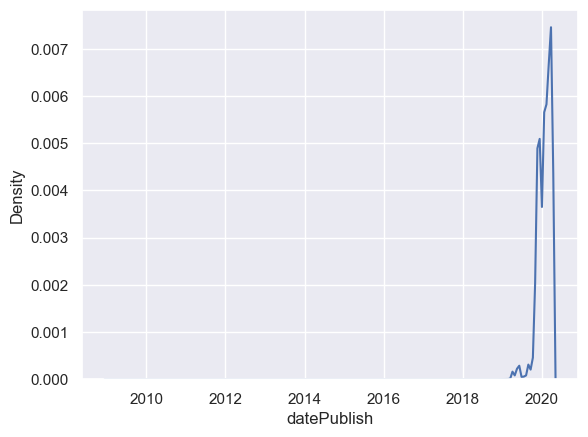

In [76]:
sns.kdeplot(articles.datePublish)
plt.show()

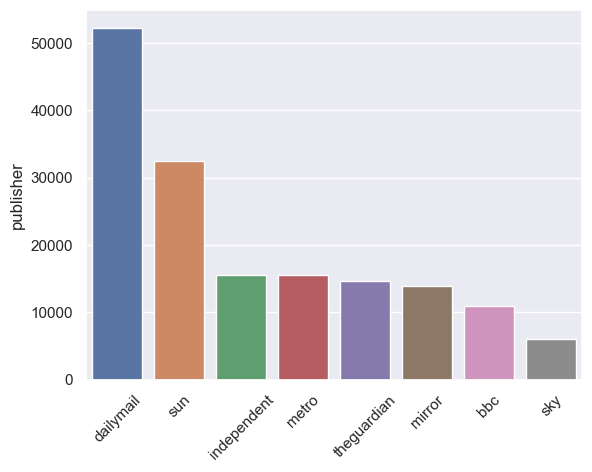

In [15]:
sns.barplot(x = articles["publisher"].value_counts().index, y = articles["publisher"].value_counts())
plt.xticks(rotation=45)
plt.show()

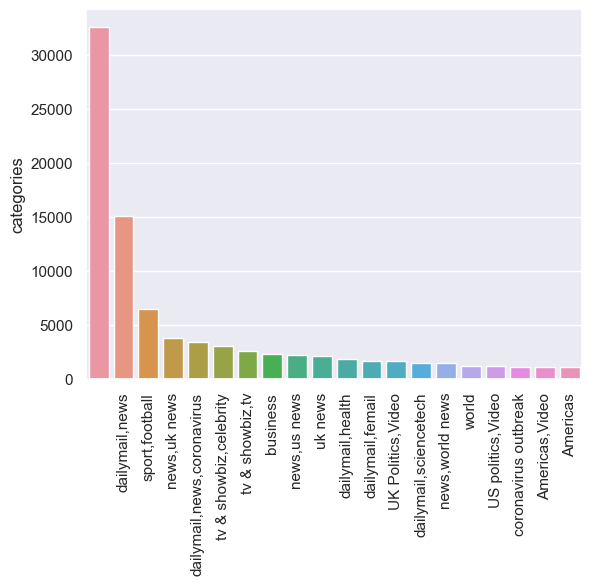

In [75]:
data = articles["categories"].value_counts()[:20]
sns.barplot(x = data.index, y = data)
plt.xticks(rotation=90)
plt.show()